In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
dataset = pd.read_csv("서울시 대기질 자료 제공_2022.csv", encoding ="cp949")

In [3]:
dataset.head()

,일시,구분,미세먼지(PM10),초미세먼지(PM2.5)
0,2022-12-31 23:00,평균,59.0,46.0
1,2022-12-31 23:00,강남구,57.0,44.0
2,2022-12-31 23:00,강동구,68.0,55.0
3,2022-12-31 23:00,강북구,59.0,42.0
4,2022-12-31 23:00,강서구,62.0,40.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227760 entries, 0 to 227759
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   일시            227760 non-null  object 
 1   구분            227760 non-null  object 
 2   미세먼지(PM10)    222844 non-null  float64
 3   초미세먼지(PM2.5)  223513 non-null  float64
dtypes: float64(2), object(2)
memory usage: 7.0+ MB


## 날짜 전처리

In [5]:
datetime_df = pd.DataFrame({'datetime': pd.to_datetime(dataset['일시'])})

In [6]:
dataset['datetime'] = datetime_df

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227760 entries, 0 to 227759
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   일시            227760 non-null  object        
 1   구분            227760 non-null  object        
 2   미세먼지(PM10)    222844 non-null  float64       
 3   초미세먼지(PM2.5)  223513 non-null  float64       
 4   datetime      227760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.7+ MB


In [8]:
dataset['Year'] = dataset['datetime'].dt.year
dataset['Month'] = dataset['datetime'].dt.month
dataset['Day'] = dataset['datetime'].dt.day
dataset['Hour'] = dataset['datetime'].dt.hour
dataset = dataset.drop(['일시', 'datetime'], axis=1)
dataset

,구분,미세먼지(PM10),초미세먼지(PM2.5),Year,Month,Day,Hour
0,평균,59.0,46.0,2022,12,31,23
1,강남구,57.0,44.0,2022,12,31,23
2,강동구,68.0,55.0,2022,12,31,23
3,강북구,59.0,42.0,2022,12,31,23
4,강서구,62.0,40.0,2022,12,31,23
...,...,...,...,...,...,...,...
227755,용산구,22.0,11.0,2022,1,1,0
227756,은평구,19.0,9.0,2022,1,1,0
227757,종로구,20.0,9.0,2022,1,1,0
227758,중구,20.0,11.0,2022,1,1,0


In [9]:
dataset_GJ = dataset[dataset['구분']=='광진구']
dataset_GJ

,구분,미세먼지(PM10),초미세먼지(PM2.5),Year,Month,Day,Hour
6,광진구,54.0,46.0,2022,12,31,23
32,광진구,51.0,44.0,2022,12,31,22
58,광진구,51.0,41.0,2022,12,31,21
84,광진구,53.0,41.0,2022,12,31,20
110,광진구,52.0,43.0,2022,12,31,19
...,...,...,...,...,...,...,...
227636,광진구,24.0,11.0,2022,1,1,4
227662,광진구,21.0,9.0,2022,1,1,3
227688,광진구,18.0,8.0,2022,1,1,2
227714,광진구,17.0,8.0,2022,1,1,1


In [10]:
dataset_AVG = dataset[dataset['구분']=='평균']
dataset_AVG

,구분,미세먼지(PM10),초미세먼지(PM2.5),Year,Month,Day,Hour
0,평균,59.0,46.0,2022,12,31,23
26,평균,58.0,45.0,2022,12,31,22
52,평균,56.0,44.0,2022,12,31,21
78,평균,56.0,43.0,2022,12,31,20
104,평균,55.0,42.0,2022,12,31,19
...,...,...,...,...,...,...,...
227630,평균,20.0,9.0,2022,1,1,4
227656,평균,20.0,9.0,2022,1,1,3
227682,평균,21.0,9.0,2022,1,1,2
227708,평균,22.0,10.0,2022,1,1,1


## 데이터 분석

In [11]:
dataset_GJ.describe()

,미세먼지(PM10),초미세먼지(PM2.5),Year,Month,Day,Hour
count,8673.000000,8673.000000,8760.0,8760.000000,8760.000000,8760.000000
mean,31.393059,18.162804,2022.0,6.526027,15.720548,11.500000
std,21.191767,13.545043,0.0,3.448048,8.796749,6.922582
min,3.000000,1.000000,2022.0,1.000000,1.000000,0.000000
25%,19.000000,9.000000,2022.0,4.000000,8.000000,5.750000
50%,27.000000,15.000000,2022.0,7.000000,16.000000,11.500000
75%,39.000000,24.000000,2022.0,10.000000,23.000000,17.250000
max,356.000000,108.000000,2022.0,12.000000,31.000000,23.000000


In [12]:
dataset_AVG.describe()

,미세먼지(PM10),초미세먼지(PM2.5),Year,Month,Day,Hour
count,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000
mean,32.783676,18.347603,2022.0,6.526027,15.720548,11.500000
std,21.961702,13.225173,0.0,3.448048,8.796749,6.922582
min,3.000000,1.000000,2022.0,1.000000,1.000000,0.000000
25%,20.000000,9.000000,2022.0,4.000000,8.000000,5.750000
50%,28.000000,15.000000,2022.0,7.000000,16.000000,11.500000
75%,40.000000,24.000000,2022.0,10.000000,23.000000,17.250000
max,353.000000,108.000000,2022.0,12.000000,31.000000,23.000000


#### 미세먼지 분포

Text(0, 0.5, 'count')

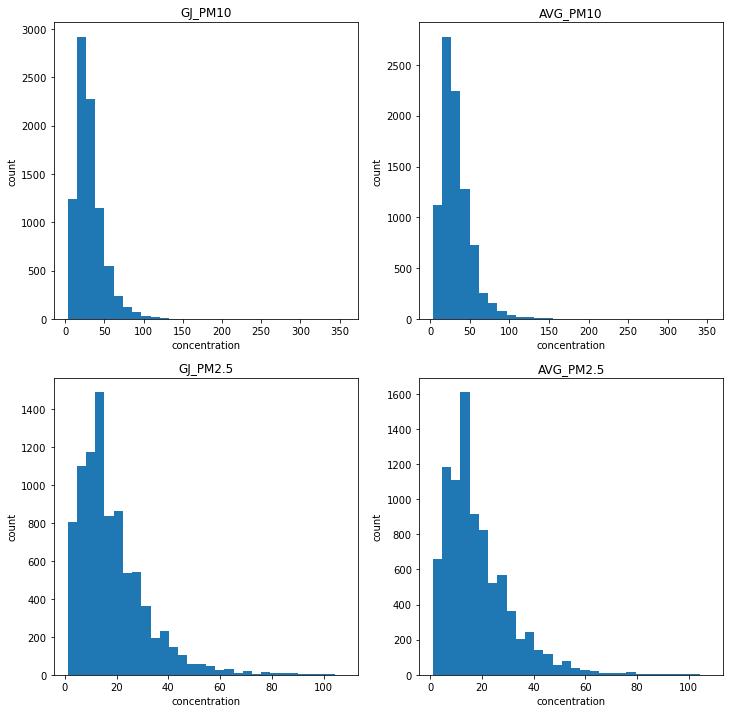

In [13]:
fig = plt.figure(figsize=(12,12))

axes1 = fig.add_subplot(2,2,1)
axes1.hist(dataset_GJ['미세먼지(PM10)'], bins=30)
axes1.set_title("GJ_PM10")
axes1.set_xlabel("concentration")
axes1.set_ylabel("count")

axes2 = fig.add_subplot(2,2,2)
axes2.hist(dataset_AVG['미세먼지(PM10)'], bins=30)
axes2.set_title("AVG_PM10")
axes2.set_xlabel("concentration")
axes2.set_ylabel("count")

axes3 = fig.add_subplot(2,2,3)
axes3.hist(dataset_GJ['초미세먼지(PM2.5)'], bins=30)
axes3.set_title("GJ_PM2.5")
axes3.set_xlabel("concentration")
axes3.set_ylabel("count")

axes4 = fig.add_subplot(2,2,4)
axes4.hist(dataset_AVG['초미세먼지(PM2.5)'], bins=30)
axes4.set_title("AVG_PM2.5")
axes4.set_xlabel("concentration")
axes4.set_ylabel("count")

#### 월/일/시간별 미세먼지 분포

In [14]:
GJ_month_PM = dataset_GJ[['Month', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Month']).mean()
GJ_day_PM = dataset_GJ[['Day', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Day']).mean()
GJ_hour_PM = dataset_GJ[['Hour', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Hour']).mean()

AVG_month_PM = dataset_AVG[['Month', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Month']).mean()
AVG_day_PM = dataset_AVG[['Day', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Day']).mean()
AVG_hour_PM = dataset_AVG[['Hour', '미세먼지(PM10)', '초미세먼지(PM2.5)']].groupby(['Hour']).mean()

No handles with labels found to put in legend.


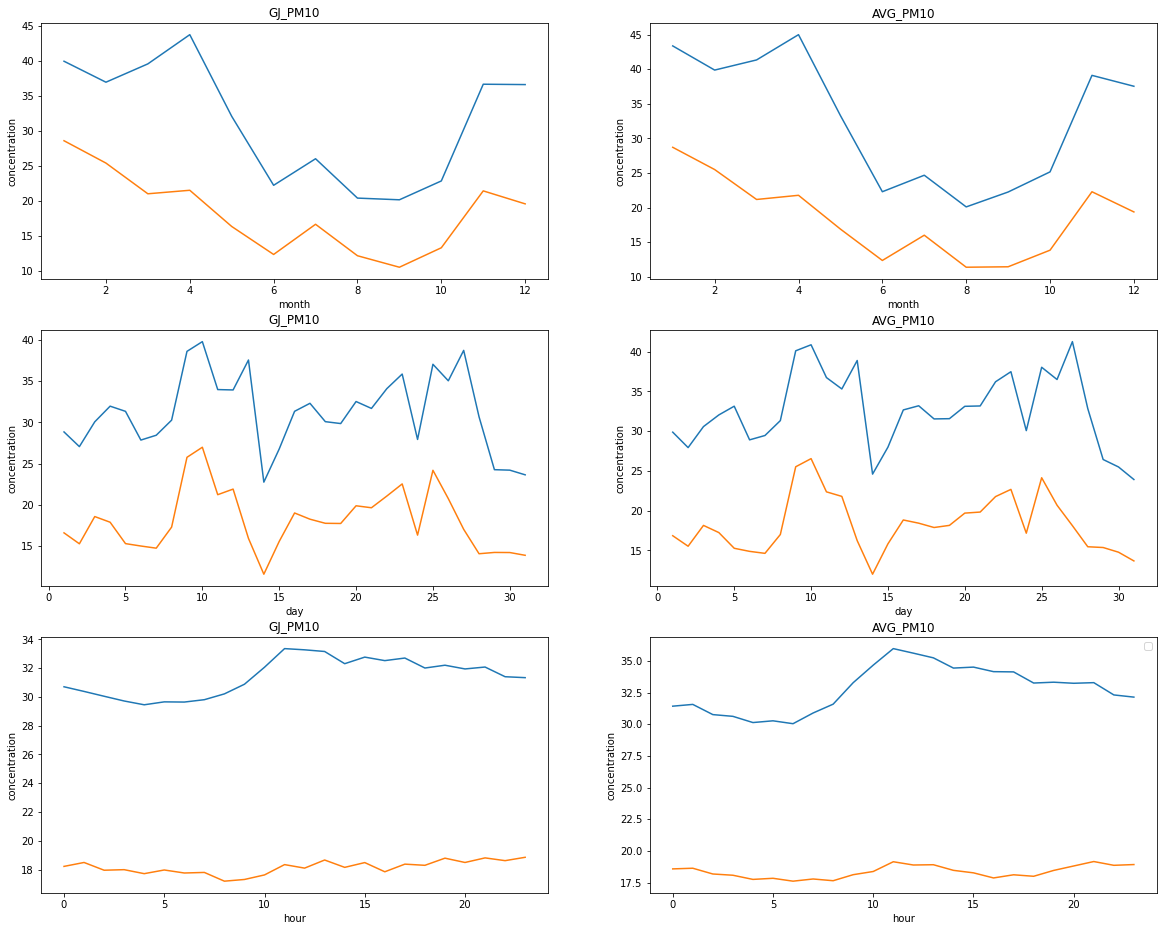

In [15]:
fig = plt.figure(figsize=(20,16))

axes1 = fig.add_subplot(3,2,1)
axes1.plot(GJ_month_PM)
axes1.set_title("GJ_PM10")
axes1.set_xlabel("month")
axes1.set_ylabel("concentration")

axes2 = fig.add_subplot(3,2,2)
axes2.plot(AVG_month_PM)
axes2.set_title("AVG_PM10")
axes2.set_xlabel("month")
axes2.set_ylabel("concentration")

axes3 = fig.add_subplot(3,2,3)
axes3.plot(GJ_day_PM)
axes3.set_title("GJ_PM10")
axes3.set_xlabel("day")
axes3.set_ylabel("concentration")

axes4 = fig.add_subplot(3,2,4)
axes4.plot(AVG_day_PM)
axes4.set_title("AVG_PM10")
axes4.set_xlabel("day")
axes4.set_ylabel("concentration")

axes5 = fig.add_subplot(3,2,5)
axes5.plot(GJ_hour_PM)
axes5.set_title("GJ_PM10")
axes5.set_xlabel("hour")
axes5.set_ylabel("concentration")

axes6 = fig.add_subplot(3,2,6)
axes6.plot(AVG_hour_PM)
axes6.set_title("AVG_PM10")
axes6.set_xlabel("hour")
axes6.set_ylabel("concentration")


plt.legend()

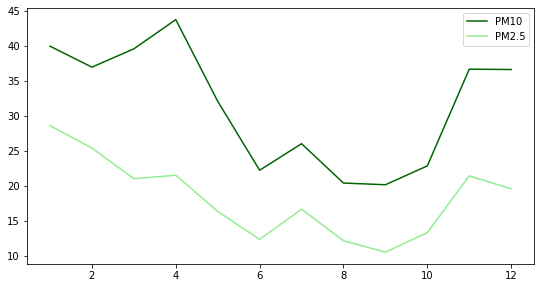

In [16]:
fig = plt.figure(figsize=(20,16))

axes1 = fig.add_subplot(3,2,1)
axes1.plot(GJ_month_PM.iloc[:,0], label = 'PM10', c='darkgreen')
axes1.plot(GJ_month_PM.iloc[:,1], label = 'PM2.5', c='lightgreen')
# axes1.set_title("GJ_PM10")
# axes1.set_xlabel("month")
# axes1.set_ylabel("concentration")
axes1.legend()

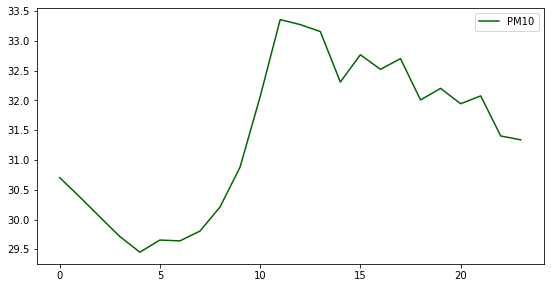

In [17]:
fig = plt.figure(figsize=(20,16))

axes5 = fig.add_subplot(3,2,5)
axes5.plot(GJ_hour_PM.iloc[:,[0]], c='darkgreen', label = 'PM10')
# axes5.plot(GJ_hour_PM.iloc[:,[1]], c='lightgreen', label= 'PM2.5')
# axes5.set_title("GJ_PM10")
# axes5.set_xlabel("hour")
# axes5.set_ylabel("concentration")
axes5.legend()